In [ ]:
import time

import platform
import io

import matplotlib.pyplot as plt
from matplotlib.pyplot import cm 

import torch
import torch.nn as nn
import torch.optim as optim

import torch.nn as nn
import torch.nn.functional as F

In [ ]:
'''
What: MLP on MNIST using Pytorch 
Why: we want a job in AI ! 
How ... see below. 

To do's 
- Download, visualize the data (done)
- Appreciate the ".shape" of the data (done)
- Define the dataloader (done)
- Build the model, i.e. "nn.Module" (done)
- Test the model, i.e. validate the forward pass. (done)
- build the function "prediction" (done)
- Define the optimizer, criterion, and maybe other stuff (done)
- Train the model (done)

- What is an epoch?  (done)
- Will plot some metrics using the prediction function (done)
- Will list few things for you to test
  - Weight Decay
  - Try to overfit!   
  - Dropout
  - Relu 
  - ... 

'''

'\nWhat: MLP on MNIST using Pytorch \nWhy: we want a job in AI ! \nHow ... see below. \n\nTo do\'s \n- Download, visualize the data (done)\n- Appreciate the ".shape" of the data (done)\n- Define the dataloader (done)\n- Build the model, i.e. "nn.Module" (done)\n- Test the model, i.e. validate the forward pass. (done)\n- build the function "prediction" (done)\n- Define the optimizer, criterion, and maybe other stuff (done)\n- Train the model (done)\n\n- What is an epoch?  (done)\n- Will plot some metrics using the prediction function (done)\n- Will list few things for you to test\n  - Weight Decay\n  - Try to overfit!   \n  - Dropout\n  - Relu \n  - ... \n\n'

In [ ]:
import torch
from torchvision.datasets import MNIST
import torchvision.transforms as transforms

train_dataset = MNIST(root='../data', 
                      train=True, 
                      transform=transforms.ToTensor(),  
                      download=True)

test_dataset = MNIST(root='../data', 
                     train=False, 
                     transform=transforms.ToTensor())


use_gpu = torch.cuda.is_available()


In [ ]:
# appreciate the shape of the dataset 
train_data = list(train_dataset)
image, label = train_data[2143]
print(image.shape)
print(label)


torch.Size([1, 28, 28])
5


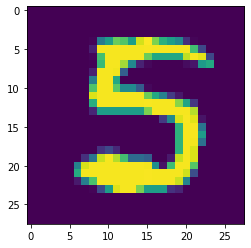

The label is 5


In [ ]:
# visualize 

plt.imshow(image.squeeze())
plt.show()
print("The label is {}".format(label))

In [ ]:
# DataLoader(dataset, batch_size=1, shuffle=False, sampler=None,
#            batch_sampler=None, num_workers=0, collate_fn=None,
#            pin_memory=False, drop_last=False, timeout=0,
#            worker_init_fn=None)

batch_size = 64         # hyper-parameter 
train_loader = torch.utils.data.DataLoader(
                            dataset = train_dataset, 
                            batch_size = batch_size, 
                            shuffle = True)

test_loader = torch.utils.data.DataLoader(
                            dataset = test_dataset, 
                            batch_size = batch_size, 
                            shuffle = True)

In [ ]:
# to appreciate the "shape" of the batches 
dd = list(train_loader)
images, labels = dd[0]
print(images.shape)
print(labels.shape)


torch.Size([64, 1, 28, 28])
torch.Size([64])


In [ ]:
# output = L3(L2(L1(input)))

# input of our MLP has to be 1 x 784
class MLP(nn.Module):
  def __init__(self, input_size, hidden_size, num_classes):
    super(MLP, self).__init__()

    h1, h2 = hidden_size

    self.block = nn.Sequential(
        nn.Linear(input_size, h1), 
        nn.Linear(h1, h2),
        nn.Linear(h2, num_classes)
        )

  def forward(self, x):
    output = self.block(x)
    return output


In [ ]:
input_size = 784
hidden_size = [2000, 500]
num_classes = 10

MLP_model = MLP(input_size, hidden_size, num_classes)

In [ ]:
dd = list(test_loader)
images, labels = dd[0] # we are selectin the first batch 

In [ ]:
# CNN ::: [bs, 1, 28, 28]
# MLP ::: [bs, 28*28]
images = images.view(-1, 28*28)
print("Input shape is {}".format(images.shape))
output = MLP_model(images)
print("Output shape is {}".format(output.shape))

Input shape is torch.Size([64, 784])
Output shape is torch.Size([64, 10])


In [ ]:
# build a function call prediciton
# the input : data, model 
# output : error rate 1/10 -- not trained yet 
loader = test_loader
correct = 0
total = 0

for i, (images, labels) in enumerate(loader): 
  images = images.view(-1, 28*28)
  outputs = MLP_model(images)
  values, predictions = torch.max(outputs, 1)
  correct += torch.sum(predictions == labels).item()
  total += labels.shape[0]


def prediction(loader, model):
  '''
  inputs: 
  outputs: 
  '''
  correct = 0
  total = 0
  losses = 0

  for i, (images, labels) in enumerate(loader):
    if use_gpu:
      # switch tensor type to GPU
      images = images.cuda()
      labels = labels.cuda()
    
      # Flatten the images
    
    images = images.view(-1, 28*28)
    
    outputs = model(images)
    
    loss = criterion(outputs, labels)
  
    _, predictions = torch.max(outputs, 1)
  
    correct += torch.sum(labels == predictions).item()
    total += labels.shape[0]
    
    losses += loss.data.item()
    
  return losses/len(list(loader)), 1 - correct/total # we need to normalize loss with respect to the number of batches 


def L2_weights_norm(model):
  '''
  L2_norm = sum((all the weights)^2)
  '''
  weights = []
  L2_norm = 0
  for name, parameters in model.named_parameters(): 
    if 'weight' in name: 
      weights.append(parameters)

  for w in weights:
    L2_norm += torch.norm(w)**2

  return L2_norm


In [ ]:
# name, parameters = list(model.named_parameters())
# why??? error?? 

In [ ]:
input_size = 784
hidden_size = [2000, 500]
num_classes = 10

MLP_model = MLP(input_size, hidden_size, num_classes)
MLP_model_reg = MLP(input_size, hidden_size, num_classes)

optimizer = optim.SGD(MLP_model.parameters(), lr=0.01, momentum=0.9)
optimizer_reg = optim.SGD(MLP_model_reg.parameters(), lr=0.01, momentum=0.9, weight_decay=0.01)

criterion = nn.CrossEntropyLoss()
criterion_reg = nn.CrossEntropyLoss()

In [ ]:
use_gpu

True

In [ ]:
# L2_Weights = L2_weights_norm(MLP_model)
# # L2_Weights.item()
# if use_gpu:
#   # switch model to GPU
#   MLP_model.cuda()
#   MLP_model_reg.cuda()
#   images = images.cuda()

# outputs_reg = MLP_model_reg(images)
# # _, predictions = torch.max(outputs_reg, 1)
# # correct_reg += torch.sum(labels == predictions).item()
# # total_reg += labels.shape[0]

# # loss_bs_reg = criterion_reg(outputs_reg, labels)
# # loss_bs_reg
# # # loss_bs_reg.backward()

In [ ]:
train_losses_reg = []
test_losses_reg = []
train_error_rates_reg = []
test_error_rates_reg = []
L2_Norms_reg = []

if use_gpu:
  # switch model to GPU
  MLP_model_reg.cuda()

num_epochs = 20

for epoch in range(num_epochs): 

  train_loss_reg = 0 
  n_iter = 0 
  total_reg = 0
  correct_reg = 0

  for i, (images, labels) in enumerate(train_loader): 
    optimizer_reg.zero_grad() 

    if use_gpu: 
      images = images.cuda()
      labels = labels.cuda()

    images = images.view(-1, 28*28)
    outputs_reg = MLP_model_reg(images) # images.shape = [64, 784]
    
    # Computes the train_error_rates  
    _, predictions = torch.max(outputs_reg, 1)
    correct_reg += torch.sum(labels == predictions).item()
    total_reg += labels.shape[0]
    
    # to compute the loss
    loss_bs_reg = criterion_reg(outputs_reg, labels)
    loss_bs_reg.backward()
    # updates the weights
    optimizer_reg.step()
    train_loss_reg += loss_bs_reg

    n_iter += 1

  train_error_rate_reg = 1 - correct_reg/total_reg
  test_loss_reg, test_error_rate_reg = prediction(test_loader, MLP_model_reg)
  
  train_error_rates_reg.append(train_error_rate_reg)
  test_error_rates_reg.append(test_error_rate_reg)
  train_losses_reg.append(train_loss_reg)
  test_losses_reg.append(test_loss_reg)

  L2_Norms_reg.append(L2_weights_norm(MLP_model_reg).item())

  if epoch%1 == 0:
    print('Epoch: {}/{}, Loss: {:.4f}, Error Rate: {:.1f}%'.format(epoch+1, num_epochs, train_loss_reg/n_iter, 100*train_error_rate_reg))


Epoch: 1/20, Loss: 0.4571, Error Rate: 12.4%
Epoch: 2/20, Loss: 0.3498, Error Rate: 9.6%
Epoch: 3/20, Loss: 0.3458, Error Rate: 9.4%
Epoch: 4/20, Loss: 0.3446, Error Rate: 9.4%
Epoch: 5/20, Loss: 0.3464, Error Rate: 9.4%
Epoch: 6/20, Loss: 0.3455, Error Rate: 9.5%
Epoch: 7/20, Loss: 0.3446, Error Rate: 9.5%
Epoch: 8/20, Loss: 0.3458, Error Rate: 9.5%
Epoch: 9/20, Loss: 0.3455, Error Rate: 9.4%
Epoch: 10/20, Loss: 0.3467, Error Rate: 9.4%
Epoch: 11/20, Loss: 0.3453, Error Rate: 9.4%
Epoch: 12/20, Loss: 0.3438, Error Rate: 9.4%
Epoch: 13/20, Loss: 0.3446, Error Rate: 9.4%
Epoch: 14/20, Loss: 0.3441, Error Rate: 9.3%
Epoch: 15/20, Loss: 0.3451, Error Rate: 9.5%
Epoch: 16/20, Loss: 0.3452, Error Rate: 9.5%
Epoch: 17/20, Loss: 0.3456, Error Rate: 9.4%
Epoch: 18/20, Loss: 0.3461, Error Rate: 9.4%
Epoch: 19/20, Loss: 0.3448, Error Rate: 9.4%
Epoch: 20/20, Loss: 0.3445, Error Rate: 9.5%


In [ ]:
# List for plotting 

train_losses = []
test_losses = []

train_error_rates = []
test_error_rates = []

L2_Norms = []

if use_gpu:
  # switch model to GPU
  MLP_model.cuda()

num_epochs = 20

for epoch in range(num_epochs): 
  train_loss = 0 
  n_iter = 0 
  total = 0
  correct = 0

  for i, (images, labels) in enumerate(train_loader): 
    optimizer.zero_grad() 

    if use_gpu: 
      images = images.cuda()
      labels = labels.cuda()

    images = images.view(-1, 28*28)
    outputs = MLP_model(images) # images.shape = [64, 784]
    
    # to compute the train_error_rates  
    _, predictions = torch.max(outputs, 1)
    correct += torch.sum(labels == predictions).item()
    total += labels.shape[0]
    
    # to compute the loss 
    loss_bs = criterion(outputs, labels)
    loss_bs.backward()

    # updates the weights
    optimizer.step()
    train_loss += loss_bs

    n_iter += 1

  train_error_rate = 1 - correct/total
  test_loss, test_error_rate = prediction(test_loader, MLP_model)

  train_error_rates.append(train_error_rate)
  test_error_rates.append(test_error_rate)
  train_losses.append(train_loss)
  test_losses.append(test_loss)

  L2_Norms.append(L2_weights_norm(MLP_model).item())

  if epoch%1 == 0:
    print('Epoch: {}/{}, Loss: {:.4f}, Error Rate: {:.1f}%'.format(epoch+1, num_epochs, train_loss/n_iter, 100*train_error_rate))


Epoch: 1/20, Loss: 0.4253, Error Rate: 11.8%
Epoch: 2/20, Loss: 0.3061, Error Rate: 8.7%
Epoch: 3/20, Loss: 0.2959, Error Rate: 8.3%
Epoch: 4/20, Loss: 0.2908, Error Rate: 8.3%
Epoch: 5/20, Loss: 0.2836, Error Rate: 7.9%
Epoch: 6/20, Loss: 0.2817, Error Rate: 8.0%
Epoch: 7/20, Loss: 0.2779, Error Rate: 7.9%
Epoch: 8/20, Loss: 0.2773, Error Rate: 7.8%
Epoch: 9/20, Loss: 0.2737, Error Rate: 7.6%
Epoch: 10/20, Loss: 0.2724, Error Rate: 7.6%
Epoch: 11/20, Loss: 0.2728, Error Rate: 7.6%
Epoch: 12/20, Loss: 0.2703, Error Rate: 7.6%
Epoch: 13/20, Loss: 0.2694, Error Rate: 7.5%
Epoch: 14/20, Loss: 0.2695, Error Rate: 7.5%
Epoch: 15/20, Loss: 0.2663, Error Rate: 7.6%
Epoch: 16/20, Loss: 0.2666, Error Rate: 7.5%
Epoch: 17/20, Loss: 0.2656, Error Rate: 7.5%
Epoch: 18/20, Loss: 0.2646, Error Rate: 7.5%
Epoch: 19/20, Loss: 0.2638, Error Rate: 7.4%
Epoch: 20/20, Loss: 0.2639, Error Rate: 7.4%


In [ ]:


'''
Plot: 
x axis : epoch 
y axis : error rate 
Learning curves (train and test). 
*** The learning curves are essential to avoir over fitting.
'''

'\nPlot: \nx axis : epoch \ny axis : error rate \nLearning curves (train and test). \n*** The learning curves are essential to avoir over fitting.\n'

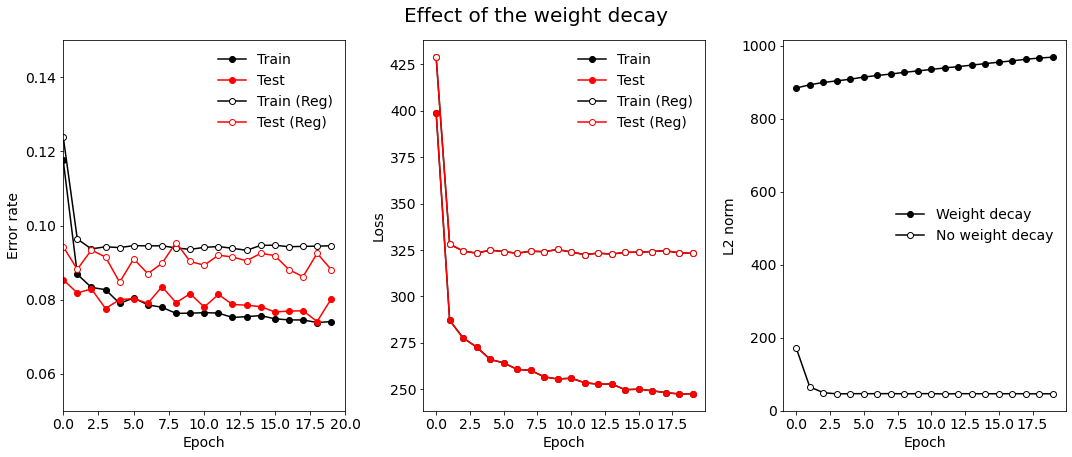

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(15,6))

ax1.plot(train_error_rates,'-ko',markersize=6)
ax1.plot(test_error_rates,'-ro',markersize=6)

ax1.plot(train_error_rates_reg,'-ko',markersize=6, markerfacecolor="white")
ax1.plot(test_error_rates_reg,'-ro',markersize=6, markerfacecolor="white")

ax2.plot(train_losses,'-ko',markersize=6)
ax2.plot(train_losses,'-ro',markersize=6)

ax2.plot(train_losses_reg,'-ko',markersize=6, markerfacecolor="white")
ax2.plot(train_losses_reg,'-ro',markersize=6, markerfacecolor="white")

ax3.plot(L2_Norms,'-ko',markersize=6)
ax3.plot(L2_Norms_reg,'-ko',markersize=6, markerfacecolor="white")

ax1.set_ylabel('Error rate',fontsize=14)
ax1.set_xlabel('Epoch',fontsize=14)

ax2.set_ylabel('Loss',fontsize=14)
ax2.set_xlabel('Epoch',fontsize=14)

ax3.set_ylabel('L2 norm',fontsize=14)
ax3.set_xlabel('Epoch',fontsize=14)
               
ax1.set_xlim([0,20])
ax1.set_ylim([0.05, 0.15])

for i, ax in enumerate([ax1, ax2, ax3]):
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(14)        

legend1 = ax1.legend(['Train','Test','Train (Reg)', 'Test (Reg)'],loc='upper right',fontsize=14,frameon=False)
legend2 = ax2.legend(['Train','Test','Train (Reg)', 'Test (Reg)'],loc='upper right',fontsize=14,frameon=False)
legend3 = ax3.legend(['Weight decay','No weight decay'],fontsize=14,frameon=False)

plt.suptitle('Effect of the weight decay', fontsize=20, y=1.05)
plt.tight_layout()

plt.show()

fig.savefig('MyFirstPlot.pdf')